# Create pedestal file

First step: create pedestal file. This should be done once. You can also call this script in command line.

`python create_fits_file_with_pedestals.py --input_file path to LST data --output_file path to pedestal file *.fits`

Data from: http://data.lstcam.pic.es/ZFITS (camera test data)

In [1]:
%run create_fits_file_with_pedestals.py --input_file Date20180705.0000.fits.fz Date20180705.0001.fits.fz --output_file pedestal.fits


Input file:  ['Date20180705.0000.fits.fz', 'Date20180705.0001.fits.fz']
Output file:  ['pedestal.fits']


In [1]:
from ctapipe.io.lsteventsource import LSTEventSource
from ctapipe.io import EventSeeker
from lst_r0 import LSTR0Corrections

In [2]:
lst_r0 = LSTR0Corrections(pedestal_path="pedestal.fits")

source = LSTEventSource(input_url="Date20180705.0010.fits.fz", max_events=300)

seeker = EventSeeker(source)
events = seeker[0:300]

for event in events:
    lst_r0.subtract_pedestal(event)
    lst_r0.time_lapse_corr(event)
    lst_r0.interpolate_spikes(event)

# Check corrections (standard deviation for all pixel )

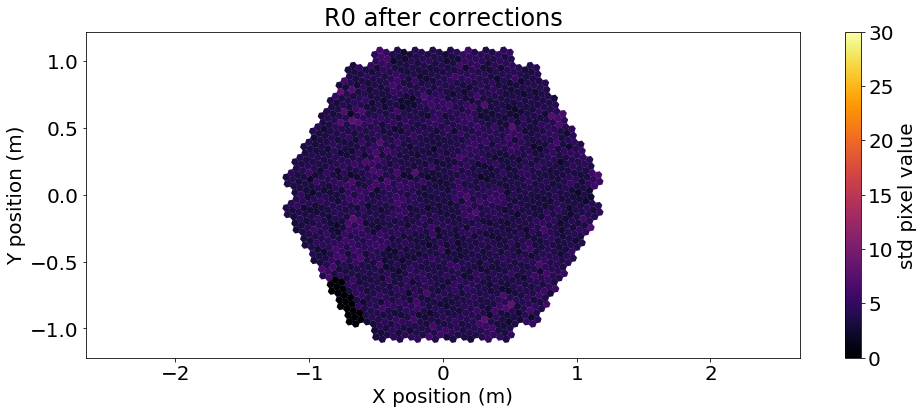

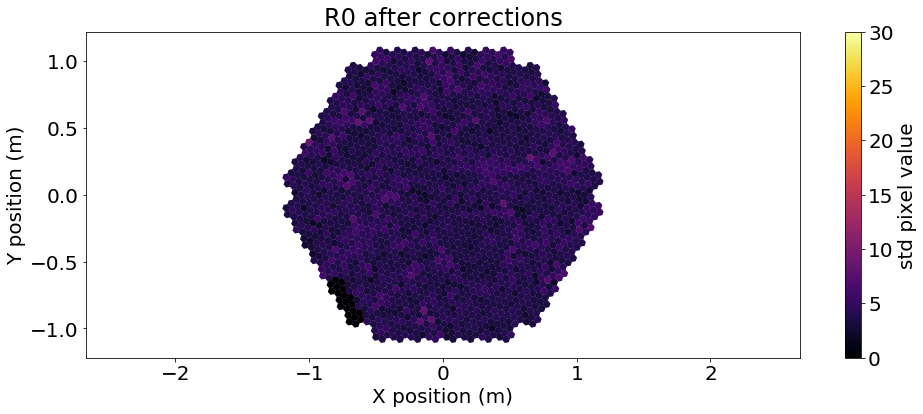

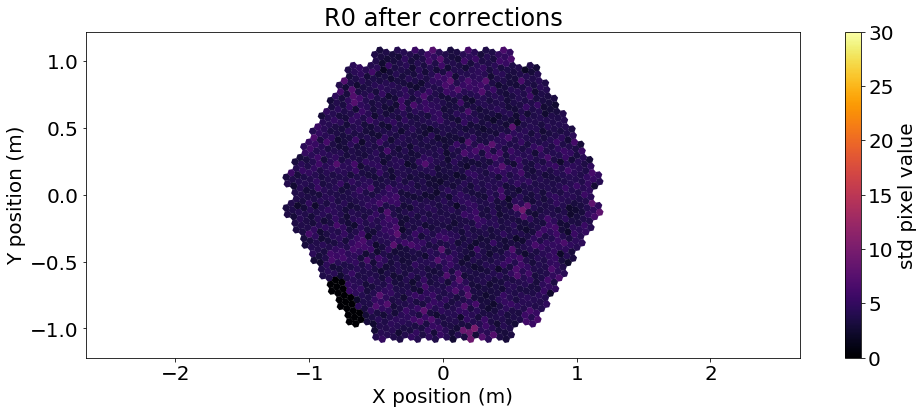

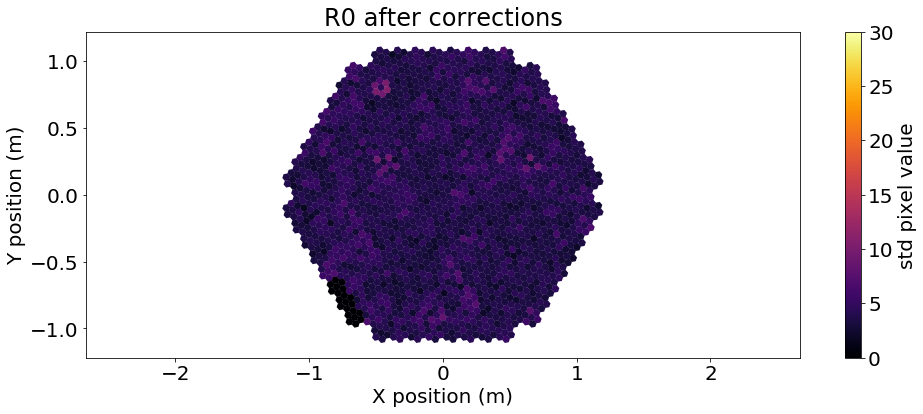

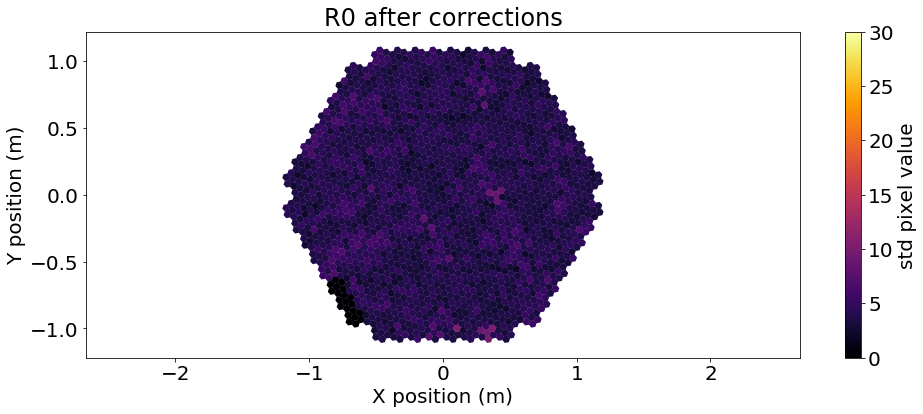

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from ctapipe.instrument import CameraGeometry
from ctapipe.visualization import CameraDisplay
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['font.size'] = 20

for ev in events[100:105]:
    N_modules = 7*ev.lst.tel[0].svc.num_modules
    std_signal = np.zeros(1855)
    for pixel in range(0, N_modules):
        std_signal[pixel] = np.std(ev.r0.tel[0].waveform[1, pixel, 2:38])
 
    geom = CameraGeometry.from_name("LSTCam")
    fig, ax = plt.subplots(figsize=(16, 6))

    disp0 = CameraDisplay(geom, ax=ax)
    disp0.cmap = 'inferno'
    disp0.image = std_signal
    disp0.add_colorbar(ax=ax, label='std pixel value')
    disp0.set_limits_minmax(0, 30)
    ax.set_title("R0 after corrections")
    plt.show()



# Display waveform

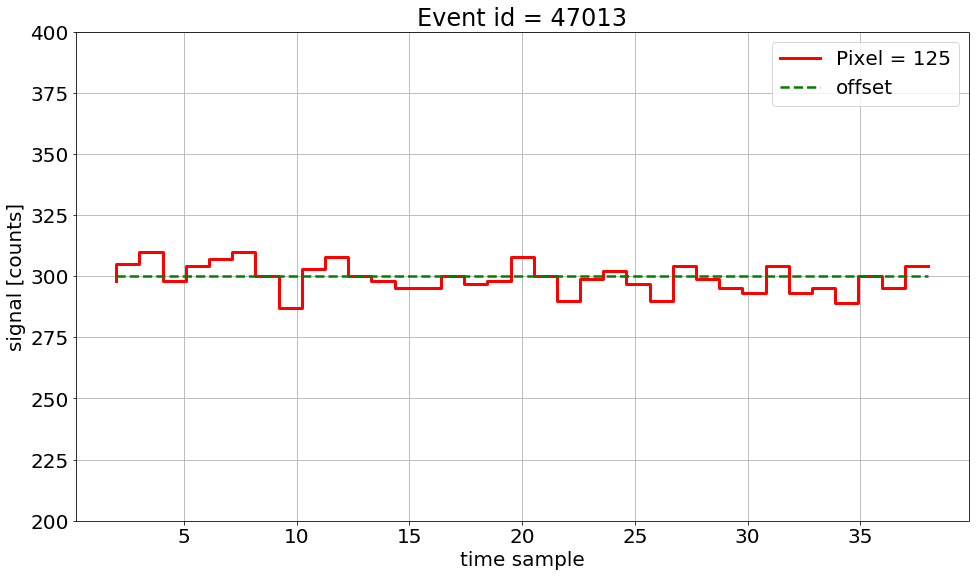

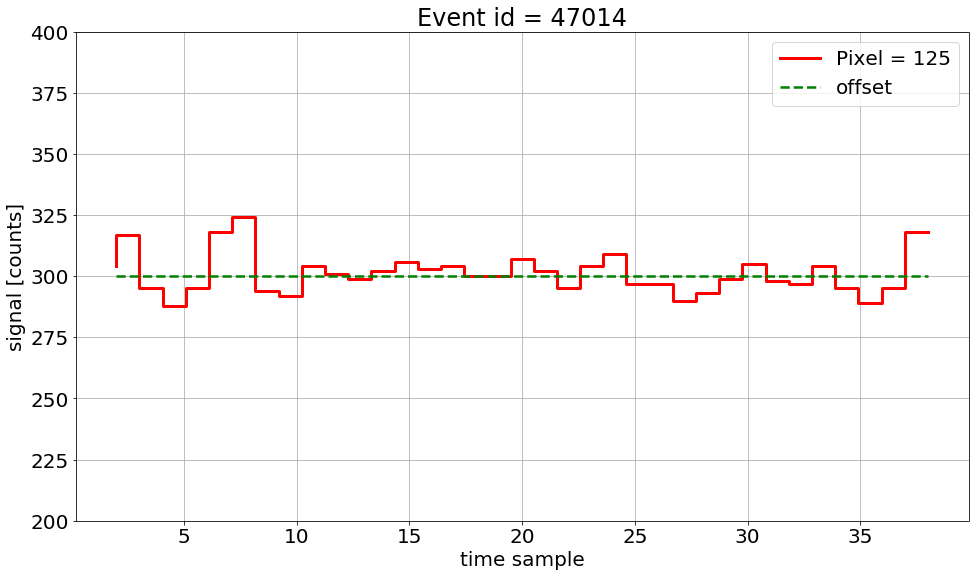

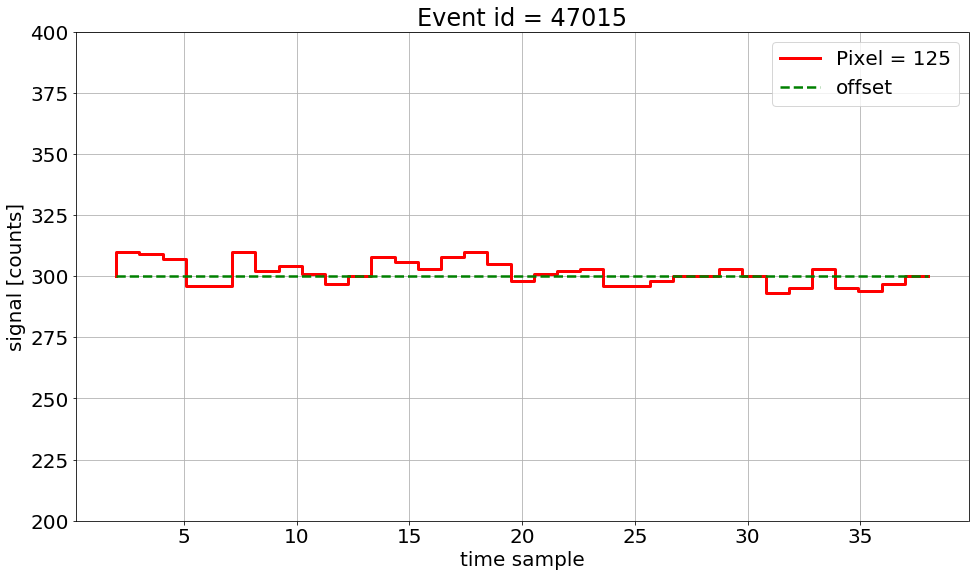

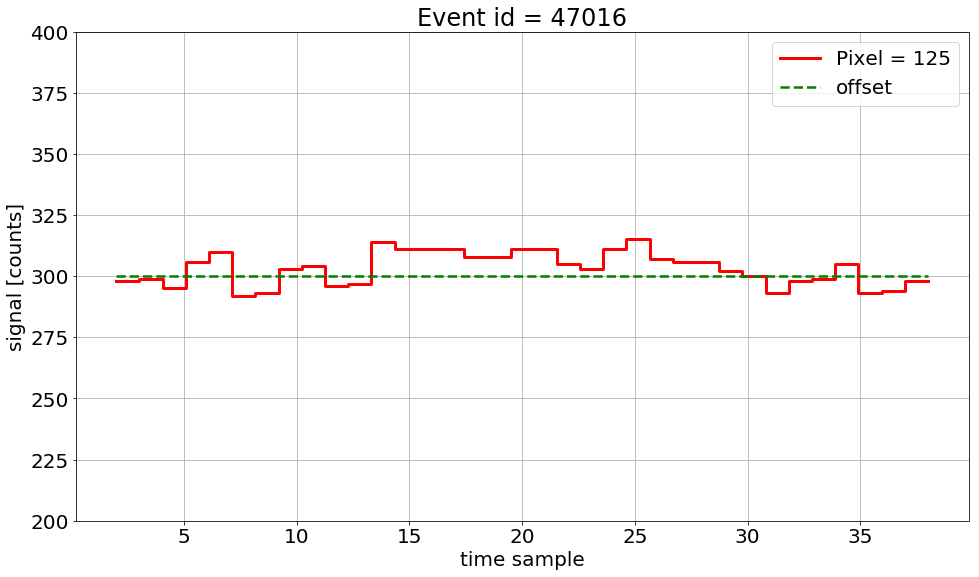

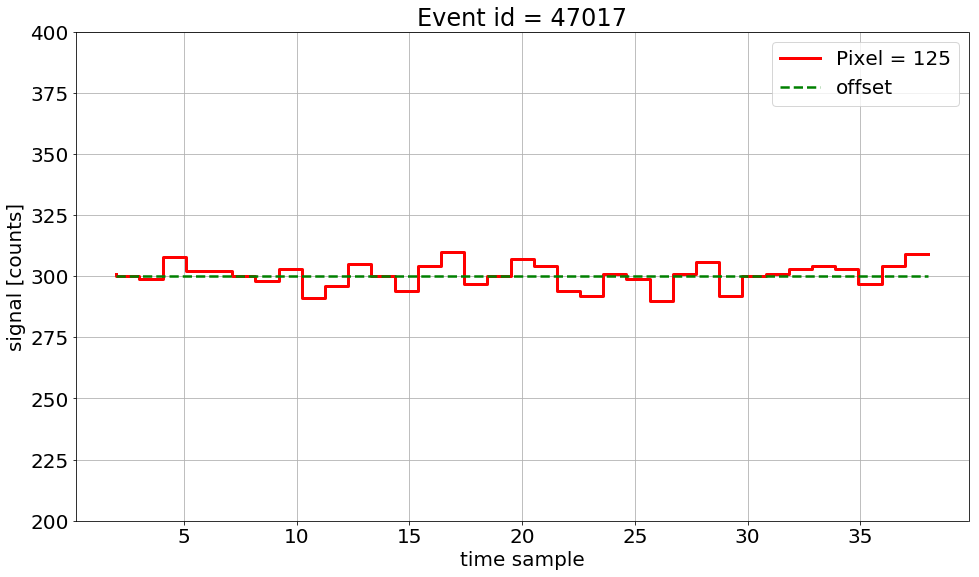

In [6]:
time_samples = np.linspace(2, 38, 36)
gain = 0 # high gain = 0, low gain = 1
pixel = 125
for ev in events[100:105]:
    plt.figure()
    plt.step(time_samples, ev.r0.tel[0].waveform[gain, pixel, 2:38], color="red", label="Pixel = {}".format(pixel), lw=3)
    plt.plot([2, 38], [300, 300], 'g--', label="offset", lw=2.5)
    plt.xlabel("time sample")
    plt.ylabel("signal [counts]")
    plt.title("Event id = {}".format(ev.r0.event_id))
    plt.ylim([200, 400])
    plt.legend()
    plt.grid(True)
    plt.show()